### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
faturamento_lojas = {
   'Loja 1': loja['Preço'].sum(),
   'Loja 2': loja2['Preço'].sum(),
   'Loja 3': loja3['Preço'].sum(),
   'Loja 4': loja4['Preço'].sum()
}
for nome_loja, total in faturamento_lojas.items ():
  print(f'{nome_loja}: R$ {total:,.2f}')


Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


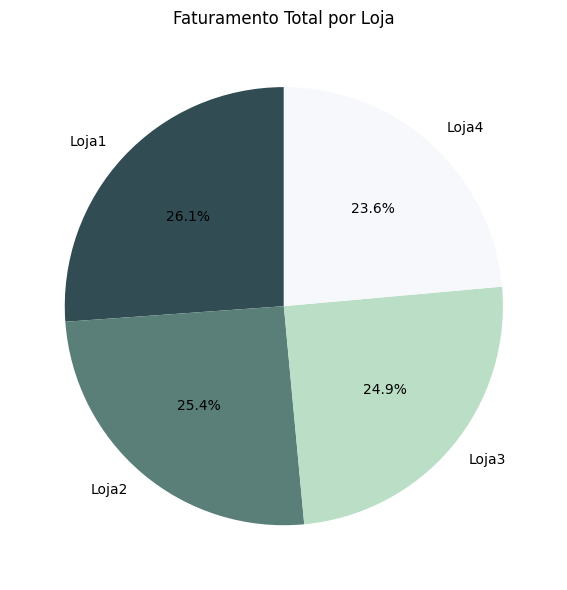

In [ ]:
import matplotlib.pyplot as plt

#Dados para o Gráfico
lojas = ['Loja1', 'Loja2', 'Loja3', 'Loja4']
faturamentos = [1534509.12, 1488459.06, 1464025.03, 1384497.58]

#Paleta de Cores
cores_personalizadas = ['#314C53', '#5A7F78', '#BBDEC6', '#F7F8FC']

#Gráfico
plt.figure(figsize=(9,6))
plt.pie(faturamentos, labels=lojas, autopct='%1.1f%%', startangle=90, colors=cores_personalizadas)
plt.title('Faturamento Total por Loja')
plt.tight_layout()
plt.show()


Total Geral de Faturamento: R$5,871,490.79

# 2. Vendas por Categoria


In [ ]:
#Vendas por Categoria para cada Loja
vendas_categoria_loja1 = loja['Categoria do Produto'].value_counts()
vendas_categoria_loja2 = loja2['Categoria do Produto'].value_counts()
vendas_categoria_loja3 = loja3['Categoria do Produto'].value_counts()
vendas_categoria_loja4 = loja4['Categoria do Produto'].value_counts()

#Conferência
print('Loja1:')
print(vendas_categoria_loja1)
print('\nloja2:')
print(vendas_categoria_loja2)
print('\nloja3:')
print(vendas_categoria_loja3)
print('\nloja4:')
print(vendas_categoria_loja4)


Loja1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

loja2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

loja3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

loja4:
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer         

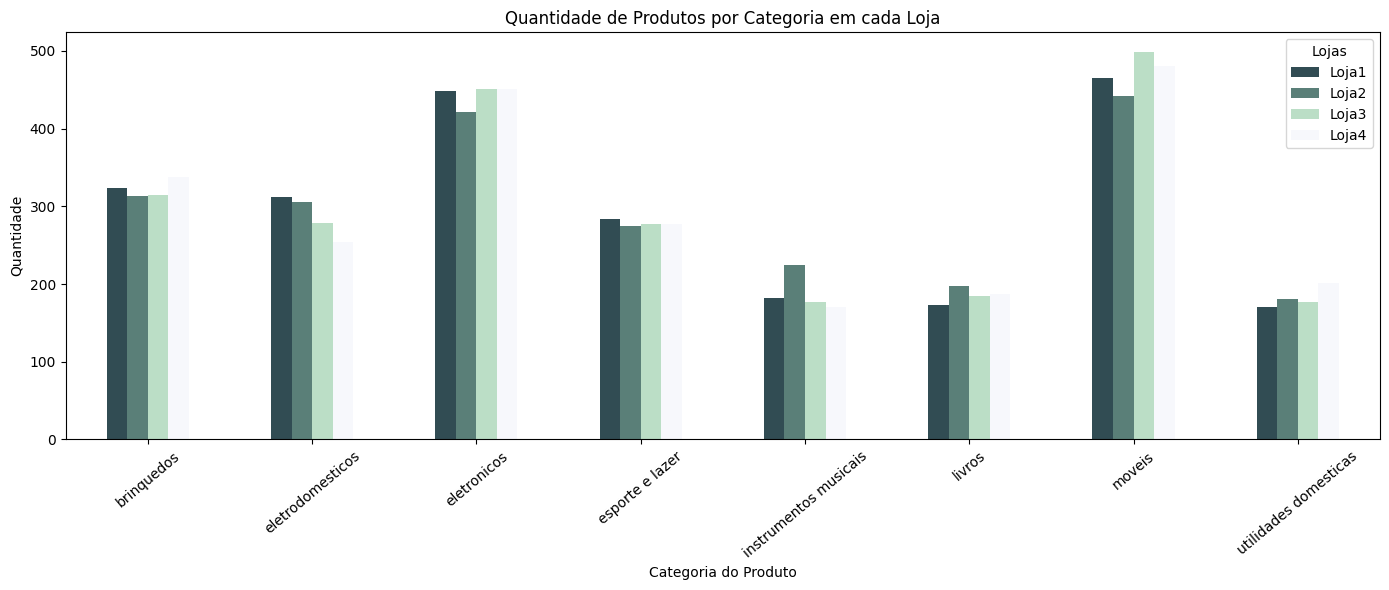

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for df in [loja, loja2, loja3, loja4]:
  df.columns = df.columns.str.strip()

  categoria_loja1 = loja['Categoria do Produto'].value_counts()
  categoria_loja2 = loja2['Categoria do Produto'].value_counts()
  categoria_loja3 = loja3['Categoria do Produto'].value_counts()
  categoria_loja4 = loja4['Categoria do Produto'].value_counts()

  df_categorias = pd.DataFrame({
      'Loja1': categoria_loja1,
      'Loja2': categoria_loja2,
      'Loja3': categoria_loja3,
      'Loja4': categoria_loja4
  }).fillna(0)

  #Paleta de Cores
cores_personalizadas = ['#314C53', '#5A7F78', '#BBDEC6', '#F7F8FC']

df_categorias.plot(kind='bar', figsize=(14,6), color=cores_personalizadas)
plt.title('Quantidade de Produtos por Categoria em cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=40)
plt.legend(title='Lojas')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
import pandas as pd

# Calculando a média da avaliação da compra para cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Criando um DataFrame para exibir os resultados de forma organizada
data_media_avaliacao = {
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média Avaliação': [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]
}

df_media_avaliacao = pd.DataFrame(data_media_avaliacao)

print("Média de Avaliação da Compra por Loja:")
print(df_media_avaliacao.to_string(float_format="{:.2f}".format))


Média de Avaliação da Compra por Loja:
     Loja  Média Avaliação
0  Loja 1             3.98
1  Loja 2             4.04
2  Loja 3             4.05
3  Loja 4             4.00


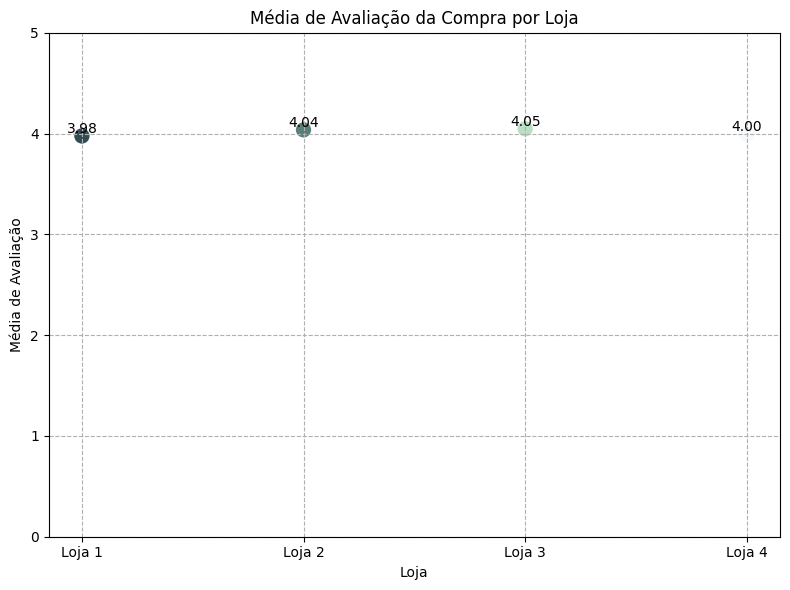

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Paleta de Cores
cores_personalizadas = ['#314C53', '#5A7F78', '#BBDEC6', '#F7F8FC']

# Criando um gráfico de dispersão com rótulos para a média de avaliação por loja
plt.figure(figsize=(8, 6))
plt.scatter(df_media_avaliacao['Loja'], df_media_avaliacao['Média Avaliação'], s=100, color=cores_personalizadas)
for i, row in df_media_avaliacao.iterrows():
    plt.text(row['Loja'], row['Média Avaliação'], f'{row["Média Avaliação"]:.2f}', ha='center', va='bottom')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação da Compra por Loja')
plt.ylim(0, 5)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
produto_mais1 = loja["Produto"].value_counts()
produto_mais2 = loja2["Produto"].value_counts()
produto_mais3 = loja3["Produto"].value_counts()
produto_mais4 = loja4["Produto"].value_counts()

resultado = f'''\033[1mPRODUTOS MAIS E MENOS VENDIDOS:\033[0m

- Loja 1 - Produto mais vendido: {produto_mais1.index[0]}
           Produto menos vendido: {produto_mais1.index[-1]}

- Loja 2 - Produto mais vendido: {produto_mais2.index[0]}
           Produto menos vendido: {produto_mais2.index[-1]}

- Loja 3 - Produto mais vendido: {produto_mais3.index[0]}
           Produto menos vendido: {produto_mais3.index[-1]}

- Loja 4 - Produto mais vendido: {produto_mais4.index[0]}
           Produto menos vendido: {produto_mais4.index[-1]}'''

print(resultado)


PRODUTOS MAIS E MENOS VENDIDOS:

- Loja 1 - Produto mais vendido: Micro-ondas
           Produto menos vendido: Celular ABXY

- Loja 2 - Produto mais vendido: Iniciando em programação
           Produto menos vendido: Jogo de tabuleiro

- Loja 3 - Produto mais vendido: Kit banquetas
           Produto menos vendido: Blocos de montar

- Loja 4 - Produto mais vendido: Cama box
           Produto menos vendido: Guitarra


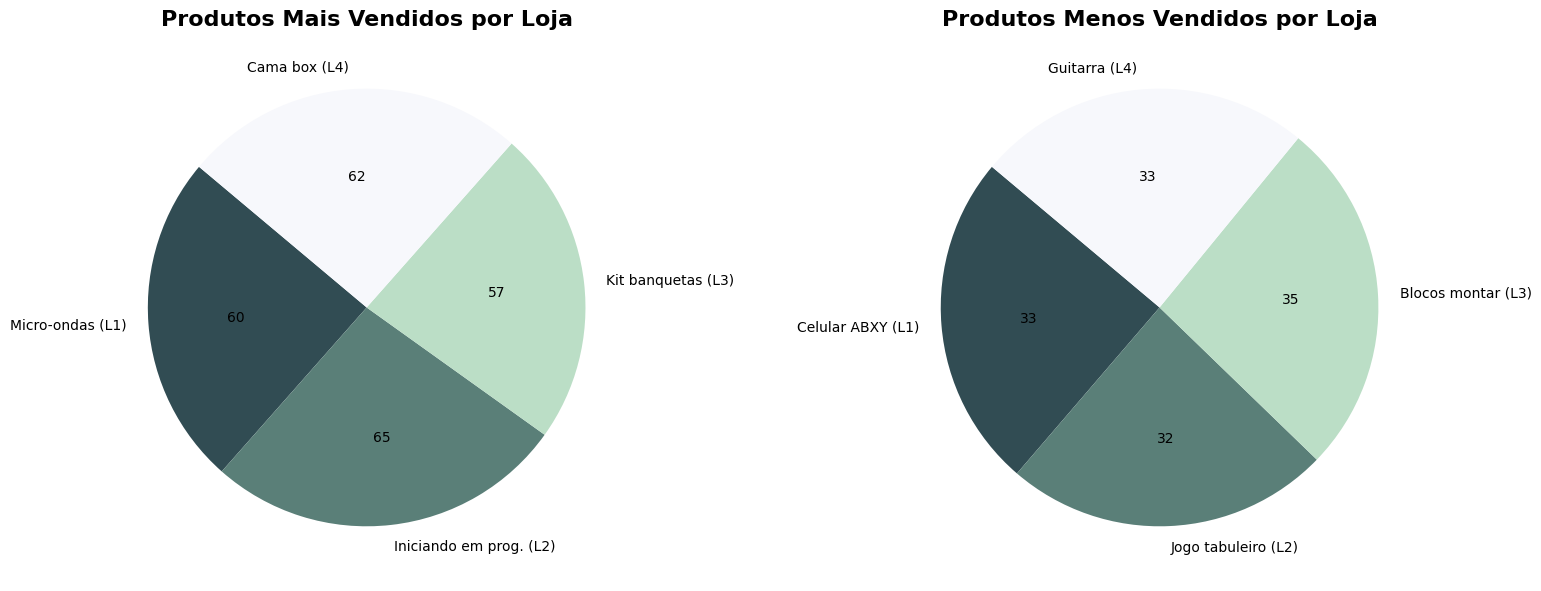

In [ ]:
import matplotlib.pyplot as plt

# Dados
produtos_mais = ["Micro-ondas (L1)", "Iniciando em prog. (L2)", "Kit banquetas (L3)", "Cama box (L4)"]
vendas_mais = [60, 65, 57, 62]

produtos_menos = ["Celular ABXY (L1)", "Jogo tabuleiro (L2)", "Blocos montar (L3)", "Guitarra (L4)"]
vendas_menos = [33, 32, 35, 33]

cores_personalizadas = ['#314C53', '#5A7F78', '#BBDEC6', '#F7F8FC']

# Função para exibir valores absolutos
def only_value_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}'
    return my_format

# Criar figura maior para mais espaçamento
plt.figure(figsize=(16, 6))

# Gráfico - Produtos Mais Vendidos
plt.subplot(1, 2, 1)
plt.pie(vendas_mais, labels=produtos_mais, autopct=only_value_format(vendas_mais),
        startangle=140, colors=cores_personalizadas)
plt.title('Produtos Mais Vendidos por Loja', fontsize=16, fontweight='bold')

# Gráfico - Produtos Menos Vendidos
plt.subplot(1, 2, 2)
plt.pie(vendas_menos, labels=produtos_menos, autopct=only_value_format(vendas_menos),
        startangle=140, colors=cores_personalizadas)
plt.title('Produtos Menos Vendidos por Loja', fontsize=16, fontweight='bold')

# Espaço horizontal entre os gráficos
plt.subplots_adjust(wspace=0.7)
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [ ]:
frete_medio_loja1 = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()


print("Frete Médio por Loja:")
print(f"Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Loja 4: R$ {frete_medio_loja4:.2f}")

Frete Médio por Loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


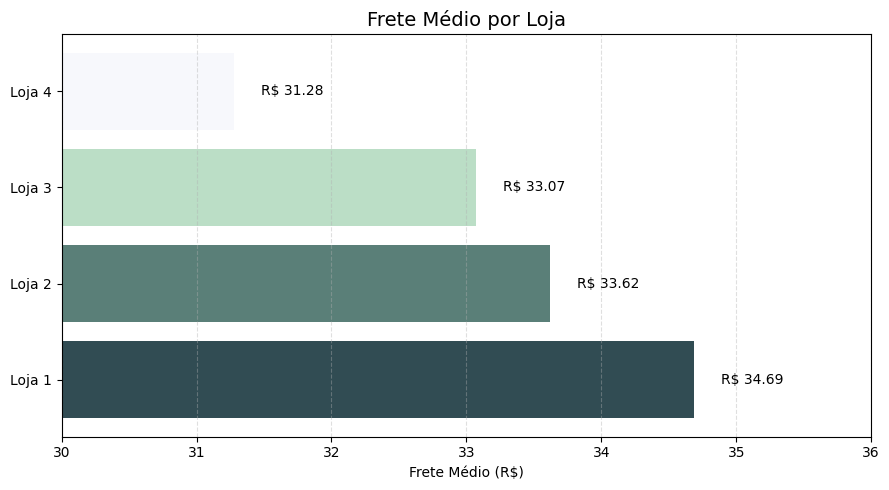

In [ ]:
import matplotlib.pyplot as plt


lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
fretes_medios = [34.69, 33.62, 33.07, 31.28]
cores_personalizadas = ['#314C53', '#5A7F78', '#BBDEC6', '#F7F8FC']



plt.figure(figsize=(9,5))
plt.barh(lojas, fretes_medios, color=cores_personalizadas)


plt.title("Frete Médio por Loja", fontsize=14)
plt.xlabel("Frete Médio (R$)")
plt.xlim(30, 36)
plt.grid(axis='x', linestyle='--', alpha=0.4)


for i, valor in enumerate(fretes_medios):
    plt.text(valor + 0.2, i, f"R$ {valor:.2f}", va='center', fontsize=10)


plt.tight_layout()
plt.savefig("frete_medio_por_loja_horizontal.png", dpi=300, bbox_inches='tight')
plt.show()


**Relatório Final de Desempenho das Lojas – Alura Store**



Objetivo:

Identificar qual das quatro lojas possui o menor desempenho geral para recomendação de venda.

Introdução:

A pedido do Sr. João, foi conduzida uma análise comparativa entre as quatro lojas da rede Alura Store com o objetivo de embasar a decisão sobre a venda de uma das unidades. Foram consideradas métricas de desempenho comercial, satisfação do cliente e eficiência operacional.



Métricas Avaliadas:


*   Faturamento Total
*   Distribuição de vendas por categoria
*   Avaliação média dos clientes
*   Produtos mais e menos vendidos
*   Custo médio do frete



Recomendação Final:

Com base na análise de todas as métricas apresentadas, a Loja 4 se destaca negativamente nos seguintes aspectos:



*   Menor faturamento total
*   Menor volume de vendas por categoria
*   Pior avaliação média dos clientes
*   Maior custo médio de frete
*   Produto menos vendido com pouca atratividade


Dessa forma, recomenda-se a venda da Loja 4. A decisão permitirá capitalizar o investimento e focar recursos nas lojas com maior potencial de retorno e desempenho mais sólido.











